In [10]:
import csv
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import StandardScaler

coches = pd.read_csv('auto.csv', sep = ',')
reader = csv.reader(coches)
header = []
for row in reader:
    header.append(row)
print (header) 
coches.head()
coches.describe()

[['cylinders'], ['displacement'], ['horsepower'], ['weight'], ['acceleration'], ['model_year'], ['origin'], ['mpg']]


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


In [11]:
#Separación de características en categóricas y continuas para posteriormente normalizarlas
categorical_features = ['origin', 'cylinders', 'model_year']
continuous_features = ['displacement','horsepower', 'weight', 'acceleration','mpg']

cont_data = coches[continuous_features]

scaler = StandardScaler().fit(cont_data)
normalized_cars = scaler.transform(cont_data)

normalized_cars = pd.DataFrame(normalized_cars, columns = ["std_displacement",
                                                           "std_horsepower",
                                                           "std_weight",
                                                           "std_acceleration",
                                                           "std_mpg"])
normalized_cars.head()

,std_displacement,std_horsepower,std_weight,std_acceleration,std_mpg
0,1.077290,0.664133,0.620540,-1.285258,-0.698638
1,1.488732,1.574594,0.843334,-1.466724,-1.083498
2,1.182542,1.184397,0.540382,-1.648189,-0.698638
3,1.048584,1.184397,0.536845,-1.285258,-0.955212
4,1.029447,0.924265,0.555706,-1.829655,-0.826925


In [12]:
#A continuación se crea una variable formada por las características continuas que hemos normalizado.
continues_features_norm =  ["std_displacement",
                            "std_horsepower",
                            "std_weight",
                            "std_acceleration",
                            "std_mpg"]

# Creamos un nuevo dataframe mediante la concatenación de las variables categóricas y las continuas estandarizas.
dfcat = coches[categorical_features]
dfcont = normalized_cars[continues_features_norm]

coches = pd.concat([dfcat,dfcont], axis = 1, sort = False)

coches.head()



,origin,cylinders,model_year,std_displacement,std_horsepower,std_weight,std_acceleration,std_mpg
0,1,8,70,1.077290,0.664133,0.620540,-1.285258,-0.698638
1,1,8,70,1.488732,1.574594,0.843334,-1.466724,-1.083498
2,1,8,70,1.182542,1.184397,0.540382,-1.648189,-0.698638
3,1,8,70,1.048584,1.184397,0.536845,-1.285258,-0.955212
4,1,8,70,1.029447,0.924265,0.555706,-1.829655,-0.826925


In [15]:
#Separación de las variables objetivo y las explicativas.
target = "std_mpg"
features = list(coches.columns)

features.remove("std_mpg")

upd_features = features
upd_features.remove('cylinders')
upd_features.remove('model_year')

x = coches [features]
y = coches [target]

dum_orig = pd.get_dummies(x['origin'])

x = x.drop(['origin'],axis=1)
x = pd.concat([x, dum_orig], axis = 1)
print(x.head(4))

#Eliminación de una columna dummies para evitar multicolinealidad.
x = x.drop([3], axis=1)

print(x.head(4))

   std_displacement  std_horsepower  std_weight  std_acceleration  1  2  3
0          1.077290        0.664133    0.620540         -1.285258  1  0  0
1          1.488732        1.574594    0.843334         -1.466724  1  0  0
2          1.182542        1.184397    0.540382         -1.648189  1  0  0
3          1.048584        1.184397    0.536845         -1.285258  1  0  0
   std_displacement  std_horsepower  std_weight  std_acceleration  1  2
0          1.077290        0.664133    0.620540         -1.285258  1  0
1          1.488732        1.574594    0.843334         -1.466724  1  0
2          1.182542        1.184397    0.540382         -1.648189  1  0
3          1.048584        1.184397    0.536845         -1.285258  1  0


In [16]:
y.head()

0   -0.698638
1   -1.083498
2   -0.698638
3   -0.955212
4   -0.826925
Name: std_mpg, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24b2eb5d50>,
      dtype=object)

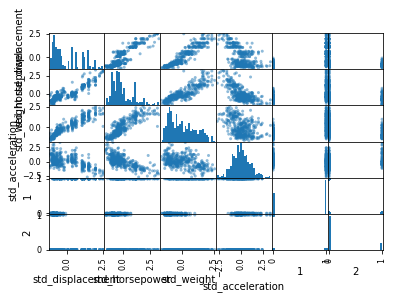

In [44]:
pd.plotting.scatter_matrix(x, hist_kwds={'bins':30})



In [ ]:
#Como se puede comprobar existen diferentes distribuciones de datos según la relación entre cada variable. 

--- MODELO DE REGRESIÓN LINEAL ---
Valor de la pendiente o coeficiente "a":
 [-0.03304608 -0.17910742 -0.58366163  0.03338414 -0.28871847 -0.18111345]
Valor de la intersección o coeficiente "b": 0.20444327853291583
Error cuadrado medio 0.2977754029749424
Error absoluto medio 0.4108424151014314
Error absoluto mediana 0.3289898130237574
PRECISIÓN - R^2 - ENTRENAMIENTO = 0.7243094939542647
PRECISIÓN - R^2 - TEST= 0.695856604749049


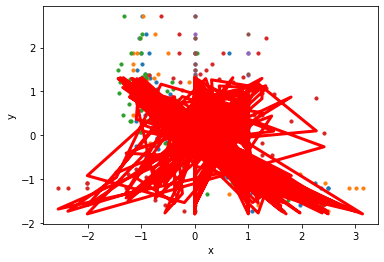

In [29]:
#Creación de variables de entrenamiento y testing
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

#Modelo de regresión lineal.
model1 = LinearRegression()
model1.fit(x_train,y_train)
y_train_pred = model1.predict(x_train)
y_test_pred = model1.predict(x_test)

print("--- MODELO DE REGRESIÓN LINEAL ---")
print('Valor de la pendiente o coeficiente "a":\n',model1.coef_)
print('Valor de la intersección o coeficiente "b":',model1.intercept_)
print('Error cuadrado medio',mean_squared_error(y_test, y_test_pred ))
print('Error absoluto medio',mean_absolute_error(y_test, y_test_pred ))
print('Error absoluto mediana',median_absolute_error(y_test, y_test_pred ))
print('PRECISIÓN - R^2 - ENTRENAMIENTO =', model1.score(x_train,y_train))
print('PRECISIÓN - R^2 - TEST=', model1.score(x_test,y_test))

#Representación grafica.

#Puntos de datos
for col in x.columns:
   plt.scatter(x_test[col], y_test, s=10)
plt.xlabel('x')
plt.ylabel('y')

#Valores predecidos.
plt.plot(x_test, y_test_pred, color ='red', linewidth=3)
plt.show()

In [22]:
#Creación de variables de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

#Transformación de características.
poly_reg = PolynomialFeatures(degree = 2)
x_train_2 = poly_reg.fit_transform(X_train)
x_test_2 = poly_reg.fit_transform(X_test)

#Definición de algoritmo a utilizar.
model2 = LinearRegression()

#Entrenamos el modelo
model2.fit(x_train_2, y_train)


LinearRegression()

In [23]:
#Realización de predición
predict_train = model2.predict(x_train_2)
predict_test = model2.predict(x_test_2)


--- MODELO DE REGRESIÓN LINEAL DE GRADO 2---
R^2 ENTRENAMIENTO 0.20798215789267072
R^2 TEST 0.22768799923440042


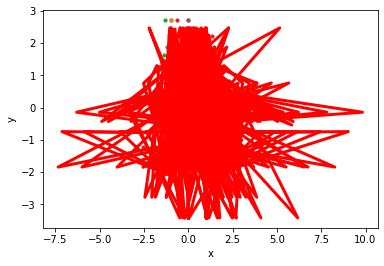

In [24]:
# Evaluación del modelo
print("--- MODELO DE REGRESIÓN LINEAL DE GRADO 2---")
print('R^2 ENTRENAMIENTO', model2.score(x_train_2, y_train))
print('R^2 TEST', model2.score(x_test_2, y_test))

#Representación grafica del modelo grado 2.

#Puntos de datos
for col in x.columns:
   plt.scatter(X_test[col], y_test, s=10)
plt.xlabel('x')
plt.ylabel('y')

#Valores predecidos.
plt.plot(x_test_2 , predict_test, color ='red', linewidth=3)
plt.show()


In [ ]:
#En este caso parece que el R2 tiene un mejor ajuste en el conjunto de entrenamiento que en el caso de la función lineal aunque
#su valor es menor

--- MODELO DE REGRESIÓN LINEAL DE GRADO 3---
R^2 ENTRENAMIENTO 0.5906998079880696
R^2 TEST -0.10087551797160033


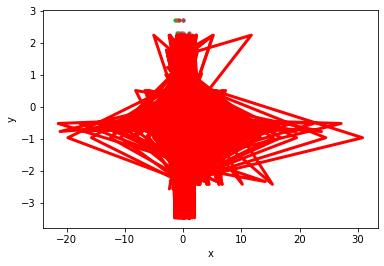

In [26]:
#Creación de variables de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

#Transformación de características.
poly_reg = PolynomialFeatures(degree = 3)
x_train_3 = poly_reg.fit_transform(X_train)
x_test_3 = poly_reg.fit_transform(X_test)

#Definición de algoritmo a utilizar.
model3 = LinearRegression()

#Entrenamos el modelo
model3.fit(x_train_3, y_train)

#Realización de predición
predict_train = model3.predict(x_train_3)
predict_test = model3.predict(x_test_3)

# Evaluación del modelo
print("--- MODELO DE REGRESIÓN LINEAL DE GRADO 3---")
print('R^2 ENTRENAMIENTO', model3.score(x_train_3, y_train))
print('R^2 TEST', model3.score(x_test_3, y_test))

#Representación grafica del modelo grado 3.

#Puntos de datos
for col in x.columns:
   plt.scatter(X_test[col], y_test, s=10)
plt.xlabel('x')
plt.ylabel('y')

#Valores predecidos.
plt.plot(x_test_3 , predict_test, color ='red', linewidth=3)
plt.show()

In [ ]:
#En este caso vemos que el modelo presenta un menor resultado en R2 en el conjunto de testing y 
#graficamente también parece menos ajustado. Seria por lo tanto mejor tomar como modelo a seguir el polinomico de grado 2. 